In [17]:
import csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC

In [2]:
import warnings
warnings.filterwarnings('ignore')  # 抑制所有警告

# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

<font color='red'>学习：用算法训练数据，从而得到模型</font>  
数据(矿藏)、算法(提炼)——<font color='#00BFFF'>长相</font>

<font color='red'>**【机器学习基础知识】**  

数据集、主要任务(分类 回归)、常见分类、注意事项</font>

# 数据长什么样

<font color='red'>常用的公开数据集、典型实例、如何使用数据、高维特征空间、(非)结构化数据</font>

【一个数据集】

鸢尾花数据集（Iris dataset）是机器学习和数据科学领域中最著名的数据集之一。它包含了来自三种不同品种的鸢尾花的样本，每种品种都有50个样本，总共包含150个样本。这个数据集常常被用来进行分类、聚类、降维和数据可视化等机器学习任务的演示和实验。

以下是鸢尾花数据集的简单介绍：

- **目标类别**：数据集包含三个不同的鸢尾花品种，分别是：
  1. 山鸢尾（Iris setosa）
  2. 杂色鸢尾（Iris versicolor）
  3. 维吉尼亚鸢尾（Iris virginica）
  

- **特征**：每个样本有四个特征，都是与花的萼片（sepals）和花瓣（petals）的尺寸相关的测量值，单位是厘米（cm）：
  1. 萼片长度（sepal length）
  2. 萼片宽度（sepal width）
  3. 花瓣长度（petal length）
  4. 花瓣宽度（petal width）


- **数据集特点**：鸢尾花数据集的一个重要特点是，其中的一种鸢尾花品种在特征空间中是线性可分的，而另外两种则不是。这使得它成为了分类算法和模型性能评估的常用测试数据集。


- **用途**：鸢尾花数据集通常被用于教育、培训和演示机器学习和数据科学的基本概念和技术。它也用于测试和比较不同分类算法的性能，因为它具有多类别问题和相对较小的样本数量。


总之，鸢尾花数据集是一个经典的数据集，有助于理解和实践各种机器学习任务，并且在学术研究和教育中广泛使用。

## 导入鸢尾花数据集(skl)

In [9]:
iris_datas = datasets.load_iris()
iris_datas

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [10]:
iris_df = pd.DataFrame(data=iris_datas.data, columns=iris_datas.feature_names) # 创建一个DataFrame
iris_df['target'] = iris_datas.target # 添加目标列
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


数据集dataset、样本sample、特征feature、类别标记label、向量vetor、矩阵matrix 

抽象简化成数学语言(机器学习算法 编程)  
X → Y ： f

## 导入鸢尾花数据集(sns)

In [3]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 数据集的使用(两个特征维度)

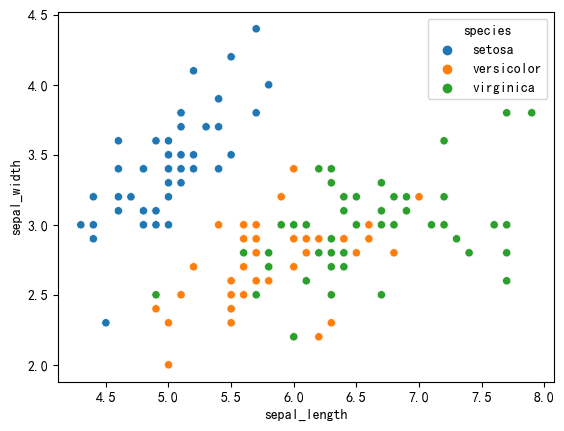

In [4]:
sns.scatterplot(iris, x='sepal_length', y='sepal_width', hue='species')
plt.show()

<IPython.core.display.Javascript object>


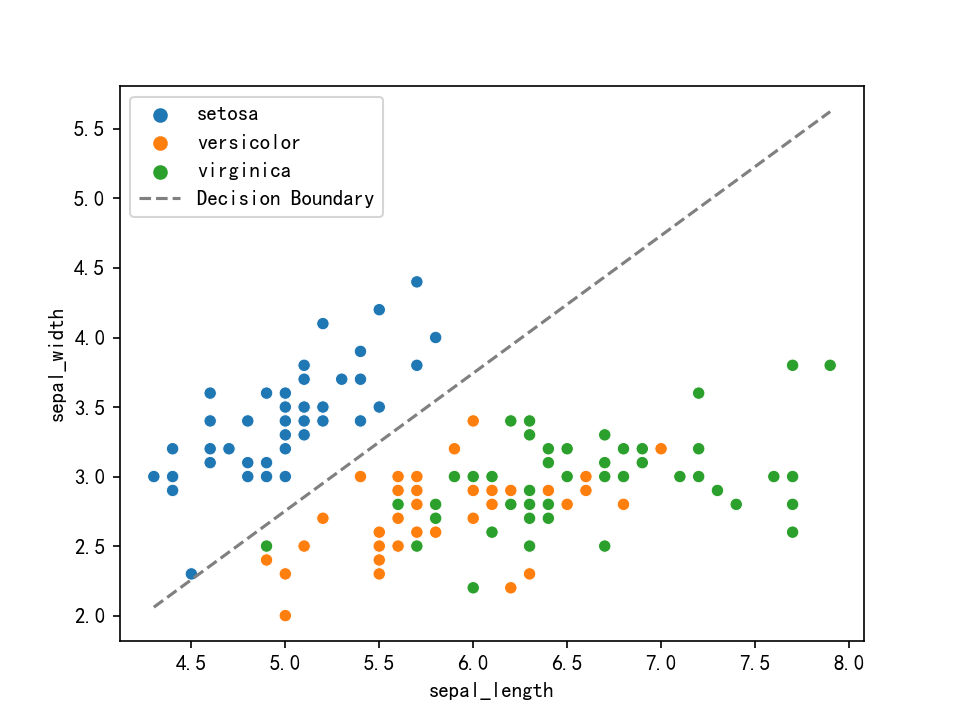

In [12]:
iris = sns.load_dataset("iris") # 加载鸢尾花数据集
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species') # 创建散点图

# 提取特征数据
X = iris[['sepal_length', 'sepal_width']].values
y = iris['species']

# 训练支持向量机分类器
clf = SVC(kernel='linear')
clf.fit(X, y)

# 获取分类器的权重和截距
w = clf.coef_[0]
b = clf.intercept_[0]

# 绘制分类线
xx = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
yy = (-w[0] / w[1]) * xx - (b / w[1])
plt.plot(xx, yy, 'k-', label='Decision Boundary', color='gray', linestyle='--')

plt.legend()
plt.show()

由特征向量构建的坐标系，称特征空间  
很容易地，蓝色的散点可与另外两种区分开——一条直线(分类函数f)——参数k m(机器学习)  

想要区分橙色散点和绿色散点——高维特征空间feature space

## 数据集的使用(三个特征维度)

In [5]:
%matplotlib notebook

<IPython.core.display.Javascript object>


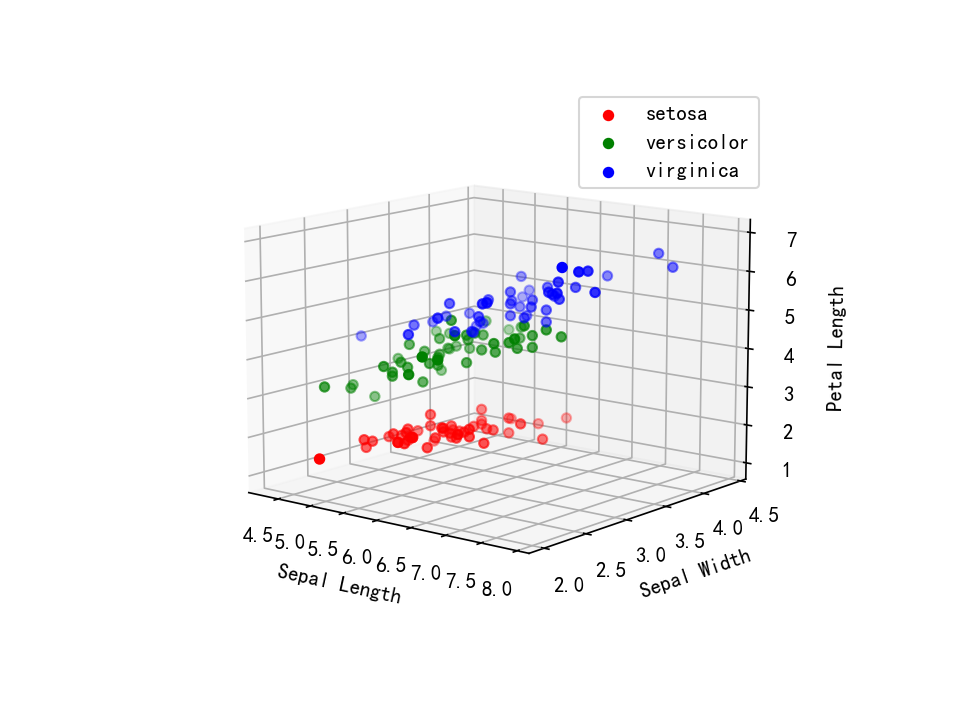

In [6]:
# 获取特征数据
x = iris['sepal_length']
y = iris['sepal_width']
z = iris['petal_length']
species = iris['species'] # 获取鸢尾花种类

# 创建一个三维坐标系
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = {'setosa': 'r', 'versicolor': 'g', 'virginica': 'b'} # 定义每个种类的颜色

# 遍历数据并根据种类绘制散点
for s in ['setosa', 'versicolor', 'virginica']:
    subset = iris[iris['species'] == s]
    ax.scatter(subset['sepal_length'], subset['sepal_width'], subset['petal_length'], c=colors[s], label=s)

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

ax.legend()
plt.show()

<IPython.core.display.Javascript object>


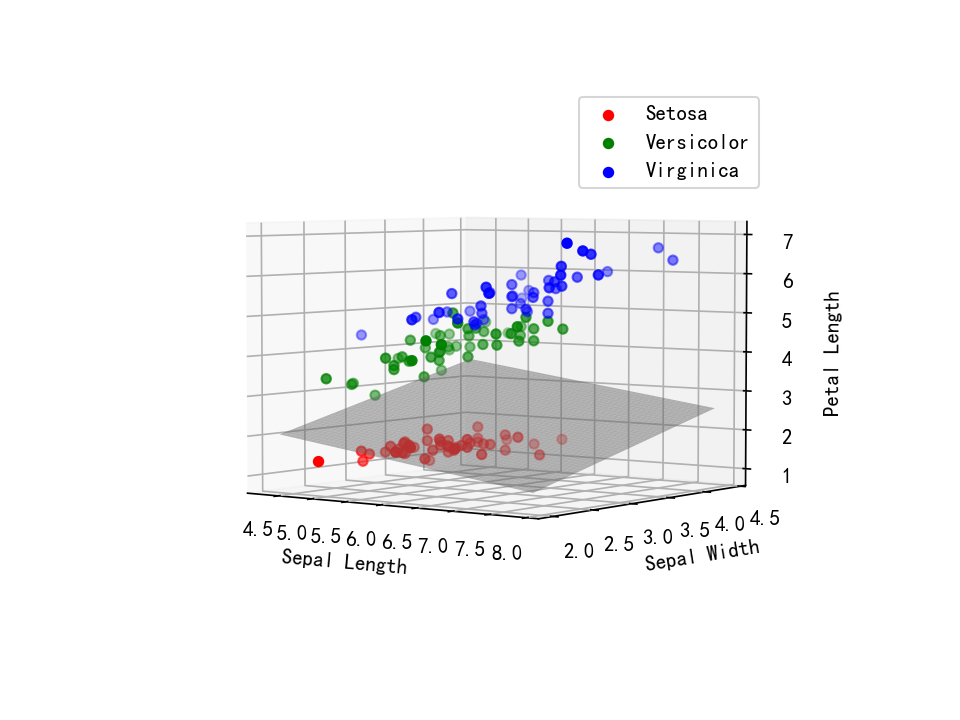

In [7]:
# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data[:, :3]  # 仅使用前三个特征，这里为了可视化仅使用前三维数据
y = iris.target

# 创建一个三维坐标系
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 定义每个种类的颜色和标签
colors = ['r', 'g', 'b']
labels = ['Setosa', 'Versicolor', 'Virginica']

# 遍历数据并根据种类绘制散点
for i in range(3):
    ax.scatter(X[y == i][:, 0], X[y == i][:, 1], X[y == i][:, 2], c=colors[i], label=labels[i])

# 训练一个支持向量机分类器
clf = SVC(kernel='linear')
clf.fit(X, y)

# 绘制分类面
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 50),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 50))
zz = (-clf.intercept_[0] - clf.coef_[0][0] * xx - clf.coef_[0][1] * yy) / clf.coef_[0][2]
ax.plot_surface(xx, yy, zz, color='gray', alpha=0.5)

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

ax.legend()
plt.show()

<IPython.core.display.Javascript object>


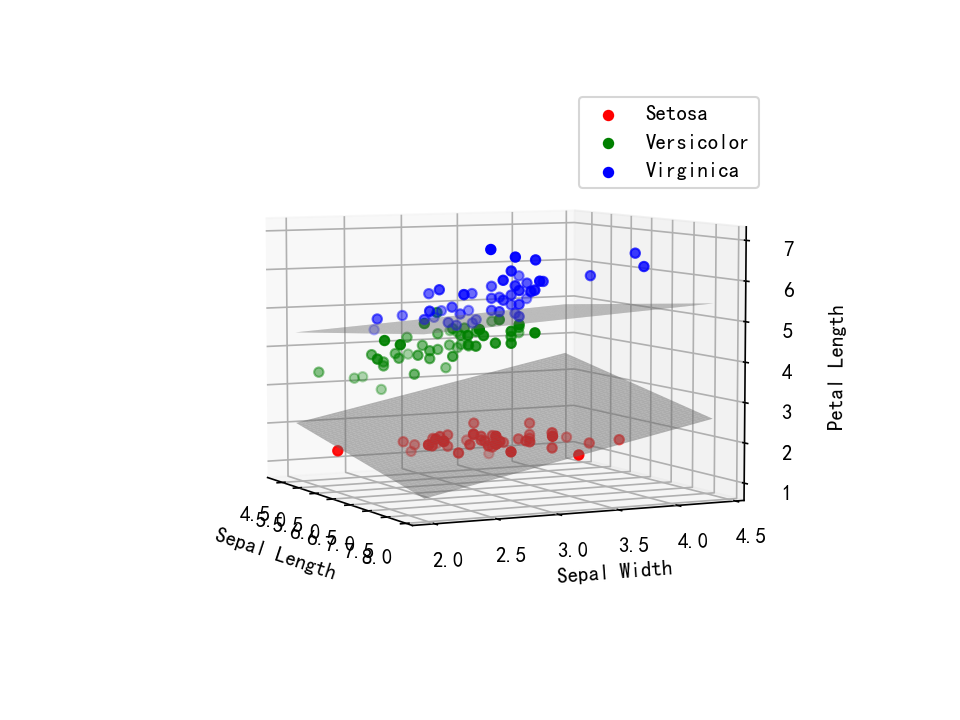

In [8]:
# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data[:, :3]  # 仅使用前三个特征，这里为了可视化仅使用前三维数据
y = iris.target

# 创建一个三维坐标系
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 定义每个种类的颜色和标签
colors = ['r', 'g', 'b']
labels = ['Setosa', 'Versicolor', 'Virginica']

# 遍历数据并根据种类绘制散点
for i in range(3):
    ax.scatter(X[y == i][:, 0], X[y == i][:, 1], X[y == i][:, 2], c=colors[i], label=labels[i])

# 训练一个支持向量机分类器
clf = SVC(kernel='linear')

# 将数据分为两类（Setosa 和 非Setosa）
y_binary = np.where(y == 0, 1, 0)

# 训练分类器
clf.fit(X, y_binary)

# 绘制分类面1
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 50),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 50))
zz = (-clf.intercept_[0] - clf.coef_[0][0] * xx - clf.coef_[0][1] * yy) / clf.coef_[0][2]
ax.plot_surface(xx, yy, zz, color='gray', alpha=0.5)

# 训练一个支持向量机分类器来分隔 Versicolor 和 Virginica
clf = SVC(kernel='linear')

# 将数据分为两类（Versicolor 和 Virginica）
y_binary = np.where(y == 2, 1, 0)

# 训练分类器
clf.fit(X, y_binary)

# 绘制分类面2
zz = (-clf.intercept_[0] - clf.coef_[0][0] * xx - clf.coef_[0][1] * yy) / clf.coef_[0][2]
ax.plot_surface(xx, yy, zz, color='gray', alpha=0.5)

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

ax.legend()
plt.show()

## 直接用图片进行分类(非结构化数据)

把数据翻译成机器能够识别的内容

非结构化数据 通过寻找特征维度 实现结构化  
非结构化数据 直接使用(图像像素点 特征向量32*32)

# 研究哪些问题

<font color='red'>
任务地图、分类任务、回归任务  

分类任务：二分类、多分类、多标签分类、更多实例  
回归任务：线性回归、多项式回归、逻辑回归
</font>

## 任务地图

<font color='red'>
标签：分类、回归  <br>
反馈：聚类、降维  <br>
奖励：强化学习  <br>
    
分类可将回归模型的输出离散化<br>
回归可将分类模型的输出连续化
</font>

分类：KNN、SVM、bayes、决策树  
回归：线性回归、SVR、随机森林  

聚类：KMeans、GMM、MeanShift  
降维：PCA、kernel

强化学习：model-free、model-based


## 分类classification：分好人坏人(智能的最简单形式)

<font color='red'>
已知样本特征  <br>
判断样本类别  <br>
<br>
二分类、多分类、多标签分类
</font>

### 二分类binary_classification：找到一直线分隔 → 0 1

### 多分类multiclass_classification： → 0 1 2 3…(类别标签互斥 概率和为1)

### 多标签分类multi_label_classification： → 0 1 2 3…(类别标签不互斥 概率和不为1)

### 更多实例

核酸检测  
二分类：阳性、阴性  
多分类：病毒类型

无人驾驶  
多分类：前后左右控制  
多标签：行人、车辆、物体

## 回归regression：父亲儿子的身高(智能的第二种形式)

### 线性回归linear_regression

In [15]:
data_height = pd.read_csv('Pretreatment.csv', encoding='GBK')
data_height

,Family(家庭编号),"Father(父亲身高,单位英寸)","Mother(母亲身高,单位英寸)",Gender(子女性别),Height(子女身高),Kids(孩子数量)
0,1,78.5,67.0,M,73.2,4
1,2,75.5,66.5,M,73.5,4
2,3,75.0,64.0,M,71.0,2
3,4,75.0,64.0,M,70.5,5
4,5,75.0,58.5,M,72.0,6
...,...,...,...,...,...,...
168,200,64.0,63.0,M,64.5,1
169,201,64.0,60.0,M,66.0,2
170,203,62.0,66.0,M,64.0,3
171,204,62.5,63.0,M,66.5,2


<IPython.core.display.Javascript object>


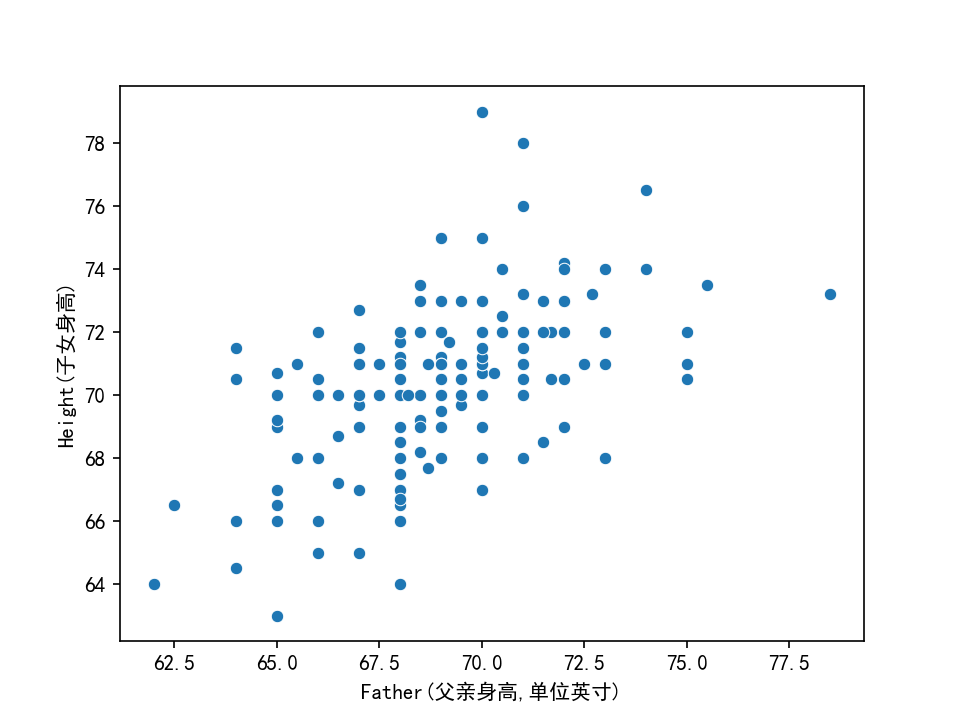

In [16]:
sns.scatterplot(data=data_height, x='Father(父亲身高,单位英寸)', y='Height(子女身高)')
plt.show()

In [18]:
father = [] # 存放父亲身高
mother = [] # 存放母亲身高
son = [] # 存放儿子身高
# 数据读取
with open("Pretreatment.csv", 'r') as file:
    reader = csv.reader(file, dialect='excel')
    i = 0
    for row in reader:
        # 去掉第一行数据
        if i == 0:
            i = 1
            continue
        father.append(float(row[1]))
        mother.append(float(row[2]))
        son.append(float(row[4]))
x_father = np.array(father).reshape(-1, 1)
x_mother = np.array(mother).reshape(-1, 1)
y_son = np.array(son).reshape(-1, 1)

In [19]:
from sklearn import linear_model
#创建线性回归对象
linear_regressor = linear_model.LinearRegression()
#用训练数据集训练模型,向fit方法中提供输入数据即可
linear_regressor.fit(x_father,y_son)

LinearRegression()

<IPython.core.display.Javascript object>


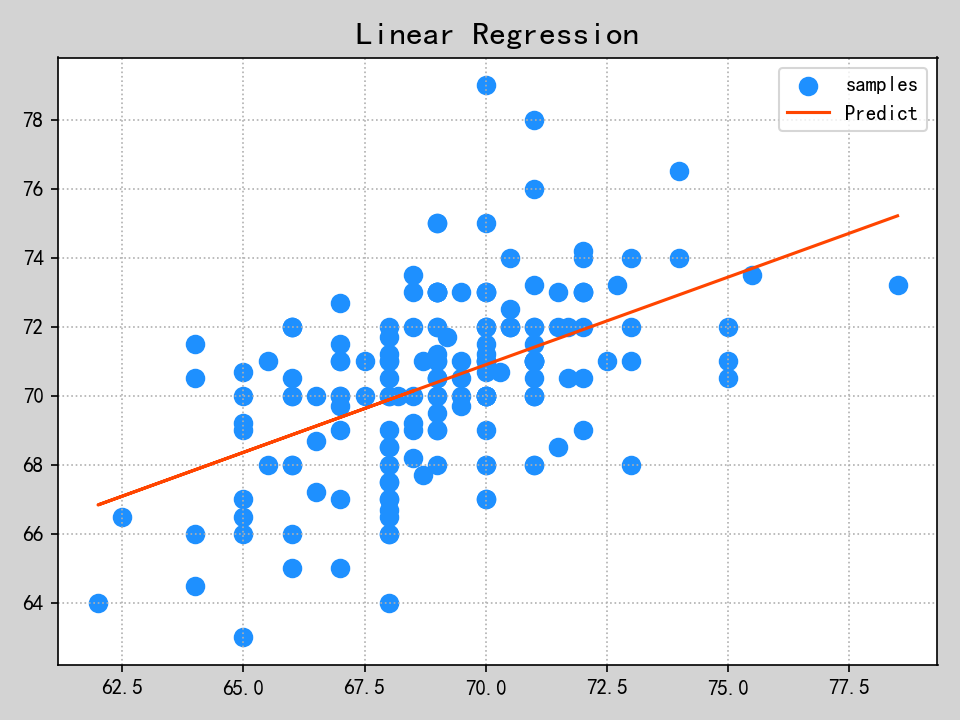

In [20]:
# 绘制散点
plt.figure("Linear Regression", facecolor="lightgray")
plt.title("Linear Regression", fontsize=16)
plt.grid(linestyle=":")
plt.scatter(x_father, y_son, s=70, color="dodgerblue", label="samples")
# 绘制拟合直线
prd_y = linear_regressor.predict(x_father)
plt.plot(x_father, prd_y, color="orangered", label="Predict")
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
import sklearn.metrics as sm
print("权重：",linear_regressor.coef_)
print("截距：",linear_regressor.intercept_)
print("R2得分:", sm.r2_score(y_son, prd_y))

权重： [[0.50765614]]
截距： [35.36149393]
R2得分: 0.25229906576460737


<IPython.core.display.Javascript object>


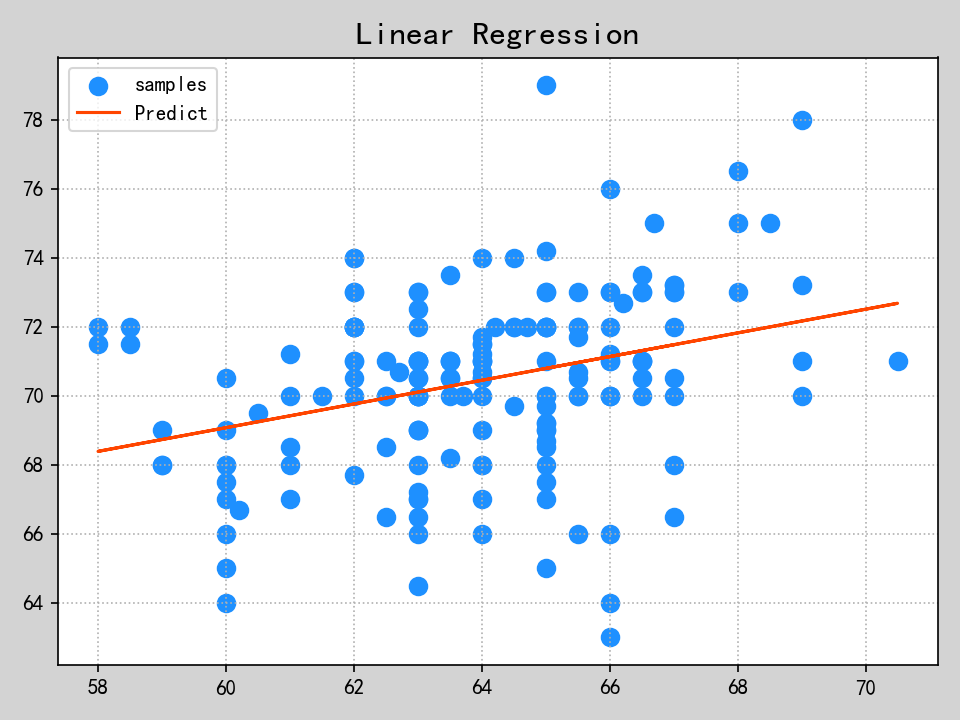

权重： [[0.34324523]]
截距： [48.47925397]
R2得分: 0.10108676414875106


In [24]:
linear_regressor.fit(x_mother,y_son)

# 绘制散点
plt.figure("Linear Regression", facecolor="lightgray")
plt.title("Linear Regression", fontsize=16)
plt.grid(linestyle=":")
plt.scatter(x_mother, y_son, s=70, color="dodgerblue", label="samples")
# 绘制拟合直线
prd_y = linear_regressor.predict(x_mother)
plt.plot(x_mother, prd_y, color="orangered", label="Predict")
plt.legend()
plt.tight_layout()
plt.show()
print("权重：",linear_regressor.coef_)
print("截距：",linear_regressor.intercept_)
print("R2得分:", sm.r2_score(y_son, prd_y))

### 多项式回归polynomial_regression

<font color='red'>
一个因变量  <br>
一个或多个自变量  <br> 
    
任何函数都可以用多项式逼近 <br>
</font>

<IPython.core.display.Javascript object>


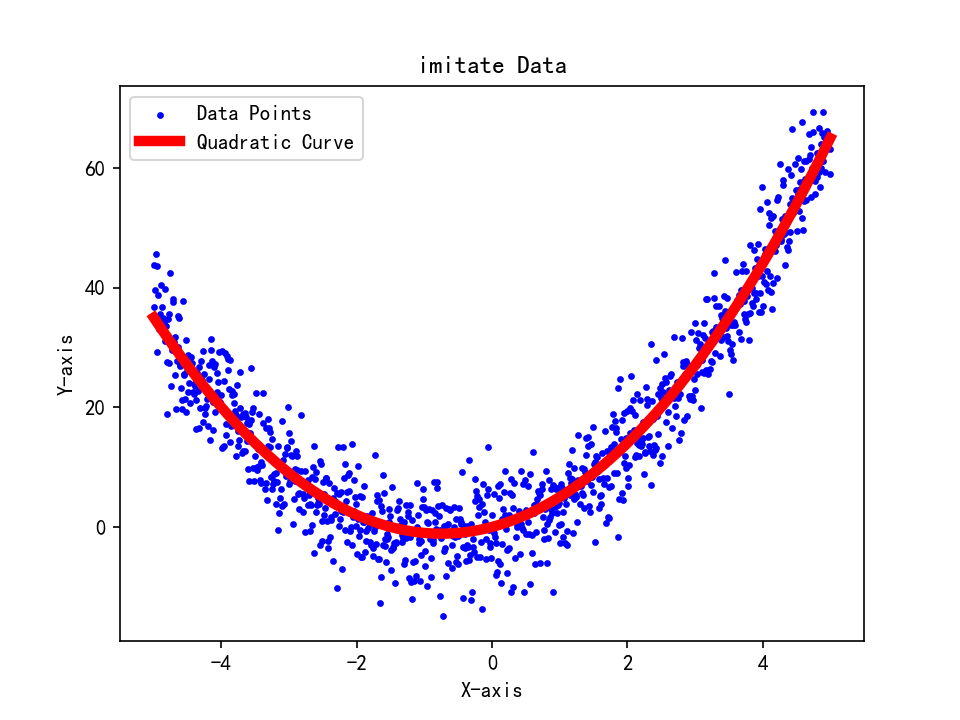

In [37]:
# 设置随机种子以便结果可重复
np.random.seed(0)

# 生成随机的二次函数数据
n_points = 1000
x = np.linspace(-5, 5, n_points)  # 生成 x 值范围
y = 2 * x**2 + 3 * x + np.random.normal(0, 5, n_points)  # 二次函数加上随机噪声
plt.scatter(x, y, label='Data Points', c='b', marker='o', s=5) # 绘制散点图

# 生成二次函数的曲线数据
curve_x = np.linspace(-5, 5, 1000)  # 更多点用于绘制曲线
curve_y = 2 * curve_x**2 + 3 * curve_x
plt.plot(curve_x, curve_y, label='Quadratic Curve', c='r', linestyle='-', linewidth=5.0) # 绘制二次函数的曲线

plt.title('imitate Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.legend()
plt.show()

### 逻辑回归logistic_regression：01

<font color='red'>
实际是分类<br>
简单可并行<br>
细节很多
</font>

# 如何分门别类(清晰框架)

分类回归 统称 监督学习(有标答)  
1 类别标记  
2 直接反馈

<font color='red'>
划分依据  <br>

监督学习、无监督学习、半监督学习、强化学习  <br>
批量学习、在线学习  <br>
基于实例的学习、基于模型的学习
</font>

## 是否有人监督

<font color='#00BFFF'>
监督学习supervised_learning(有标答) - 预测 回归/分类  <br>
无监督学习unsupervised_learning(探索) - 挖掘隐藏关系 聚类/降维/关联规则学习  <br>
半监督学习semi_supervised_learning(折中 少量标记)  <br>
强化学习reinforcement_learning(训狗 环境和行动的互动) - 最大化收益
</font>  

聚类：电商网站的购物信息  
k-means算法  
密度聚类DBSCAN  
最大期望算法  

降维：特征之间存在强关联关系(不丢失太多数据 尽可能简化数据 信息压缩)  
主成分分析PCA  
核方法

关联规则学习：购物栏分析 啤酒和尿布  
挖掘特征间的关联  
apriori方法  
eclat方法  

强化学习：围棋  
1 观测环境  
2 估计状态  
3 执行操作  
4 获得回报或惩罚

## 对数据的使用方式

<font color='#00BFFF'>
静态学习/离线批量学习batch_learning  <br>
动态学习/增量在线学习online_learning
</font>  

批量学习  
1 先训练再使用  
2 需要大量的时间和计算资源  
3 通常都是离线完成

在线学习  
1 循序渐进  
2 边学边用

## 如何将模型泛化

<font color='#00BFFF'>
基于实例的学习：先记住训练实例、再通过相似度计算  <br>
基于模型的学习：先构建模型、然后预测
</font>

# 常见误区和局限

数据越多越好吗  
模型真的可信吗  
随机和确定性哪个更好  
小样本集怎么办  
推断而不只是判断  
要不要讲武德  
机器学习不死